Overall Library Resources KPI:
Total Books: 30965.0
Total Students: 206
Books per Student: 150.32

Department-wise KPIs:

Department: Artificial Intelligence
Books: 26478.0
Students: 141
Books per Student: 187.79

Department: Cyber Security
Books: 1598.0
Students: 49
Books per Student: 32.61

Department: Data Science
Books: 2888.0
Students: 16
Books per Student: 180.50

Model Performance:
Mean Squared Error: 4414.58
R-squared: nan


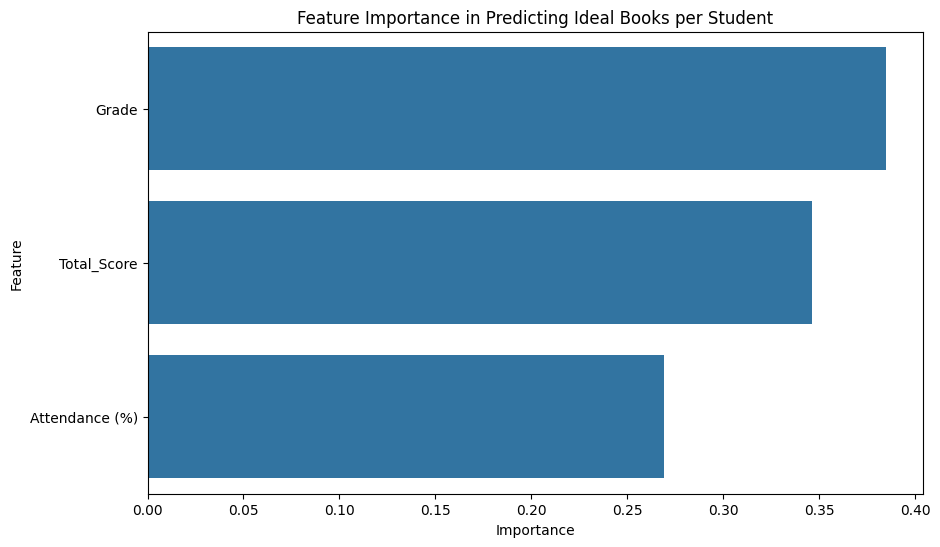


Gap Analysis and Action Plans:
                Department  books_per_student  predicted_books_per_student  \
0  Artificial Intelligence         187.787234                   121.344898   
1           Cyber Security          32.612245                    65.147551   
2             Data Science         180.500000                   142.049184   

         gap  resource_status  \
0 -66.442336   Over-resourced   
1  32.535306  Under-resourced   
2 -38.450816   Over-resourced   

                                         action_plan  
0  Consider reallocating resources to other depar...  
1  Invest in latest cybersecurity references and ...  
2  Consider reallocating resources to other depar...  


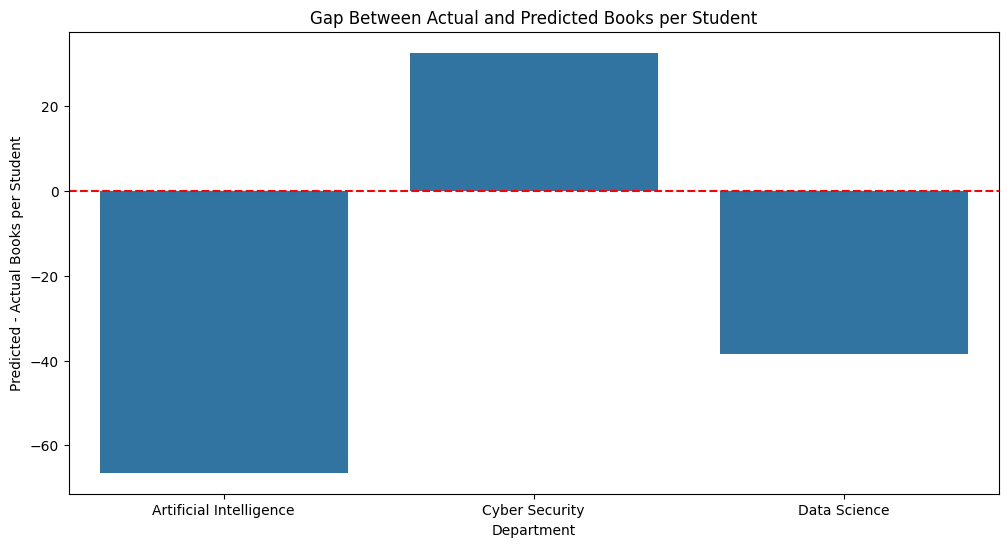


Tracking for Artificial Intelligence Department:


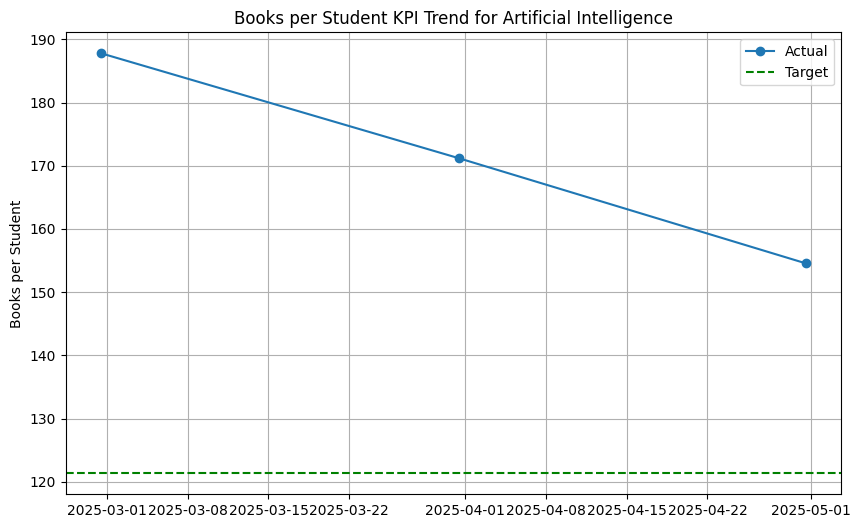

{'department': 'Artificial Intelligence', 'current_kpi': np.float64(187.7872340425532), 'target_kpi': np.float64(121.34489795918365), 'gap': np.float64(-66.44233608336954), 'status': 'Over-resourced', 'action_plan': 'Consider reallocating resources to other departments or improving utilization', 'progress': [('2025-02', np.float64(187.7872340425532)), ('2025-03', np.float64(171.17665002171083)), ('2025-04', np.float64(154.56606600086843))]}

Tracking Overall Library Resources:


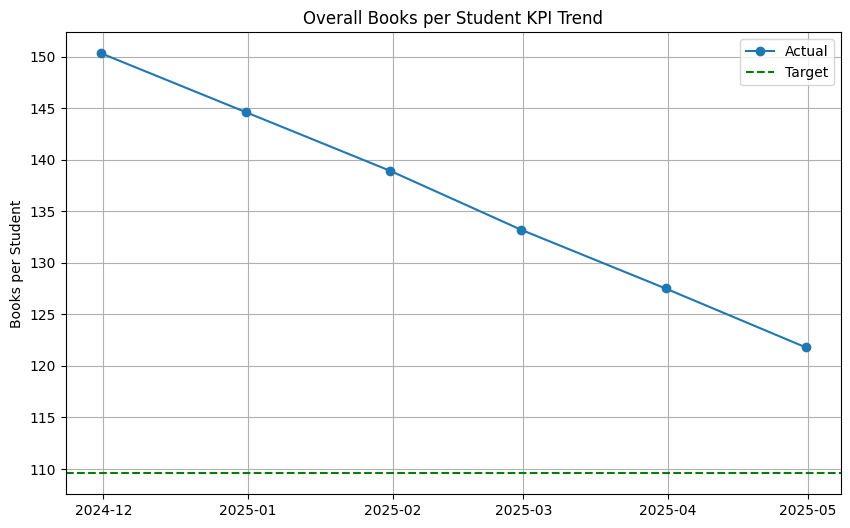

{'scope': 'overall', 'current_kpi': np.float64(150.31553398058253), 'target_kpi': np.float64(109.58566772340004), 'gap': np.float64(-40.72986625718249), 'progress': [('2024-11', np.float64(150.31553398058253)), ('2024-12', np.float64(144.61335270457698)), ('2025-01', np.float64(138.91117142857144)), ('2025-02', np.float64(133.2089901525659)), ('2025-03', np.float64(127.50680887656033)), ('2025-04', np.float64(121.80462760055478))]}

Timetable for Artificial Intelligence Department:
   Month        Date    Activity  \
0      1  2025-05-01  KPI Review   
1      3  2025-06-30  KPI Review   
2      5  2025-08-29  KPI Review   
3      7  2025-10-28  KPI Review   
4      9  2025-12-27  KPI Review   
5     11  2026-02-25  KPI Review   

                                             Details  \
0  Measure books/student ratio (Current: 187.8, T...   
1  Measure books/student ratio (Current: 187.8, T...   
2  Measure books/student ratio (Current: 187.8, T...   
3  Measure books/student ratio (Curr

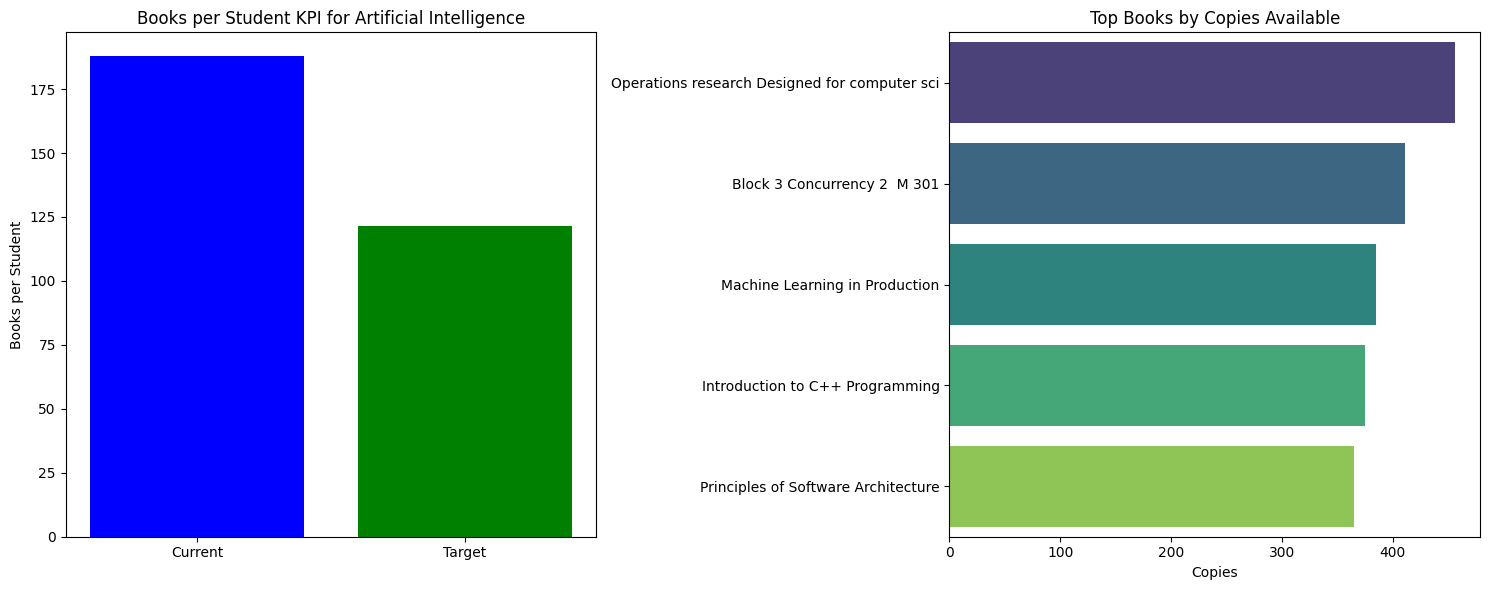


    LIBRARY RESOURCES REPORT FOR DATA SCIENCE

    Key Metrics:
    - Current Books per Student: 180.50
    - Recommended Target: 142.05
    - Gap: -38.45
    - Resource Status: Over-resourced

    Department Statistics:
    - Total Books: 2888.0 # Use .get() with default
    - Student Count: 16 # Use .get() with default
    - Average Student Performance: 68.3/100
    - Percentage with A/B Grades: 43.8%

    Top 5 Books by Copies:
                                            Book_Name      Authors_Name  Copies
Fundamental Mathematics for Computer Applications  Dr. Sudhir Kumar   165.0
                   Data Structures and Algorithms          KM Anjli   156.0
     College Mathematics for Bus,Eco,life science RAymon A. Barnett   154.0
                                 GDPR for dummies    Suzanne Dibble   154.0
       Data Mining With python Theory,Application             DI WU   150.0

    Recommended Action Plan:
    Consider reallocating resources to other departments or improving util

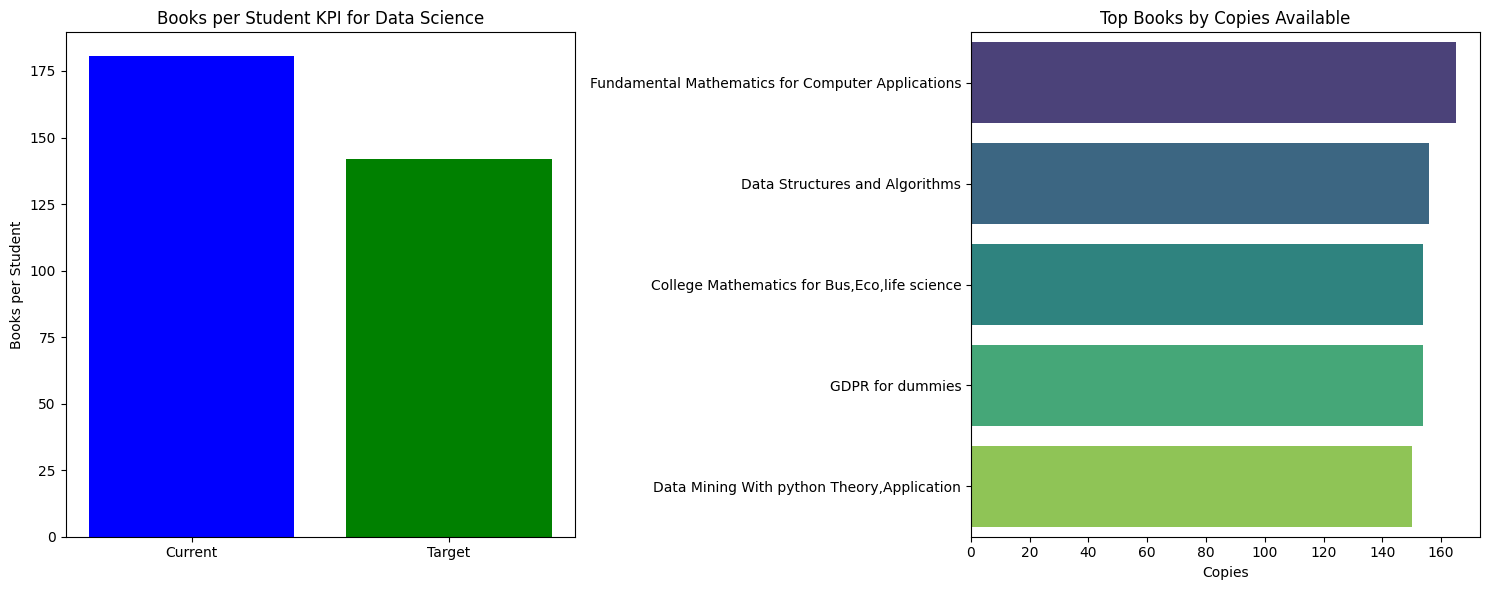

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



## Step 1: Load and Prepare the Datasets

# Load the books dataset
books_path = '/content/book.xlsx - Sheet1.csv'  # Update with your path
books_df = pd.read_csv(books_path, skiprows=1, header=None)
books_df.columns = ['ID', 'Book_Name', 'Specialization', 'Authors_Name', 'Publisher', 'Copies']

# Clean the data - remove any rows with missing values in key columns
books_df = books_df.dropna(subset=['Book_Name', 'Specialization', 'Copies'])

# Convert 'Copies' to numeric, coercing errors, and fill NaN with 0
books_df['Copies'] = pd.to_numeric(books_df['Copies'], errors='coerce').fillna(0)


# Load the students dataset
students_path = '/content/level3grades - Students_Grading_Dataset.csv'  # Update with your path
students_df = pd.read_csv(students_path)

## Step 2: Define the KPI - Books per Student Ratio

def calculate_kpi(books_df, students_df):
    # Calculate total books
    total_books = books_df['Copies'].sum()

    # Count students by department
    student_counts = students_df['Department'].value_counts().to_dict()

    # Count books by specialization (which aligns with departments)
    books_by_specialization = books_df.groupby('Specialization')['Copies'].sum().to_dict()

    # Map specializations to departments (adjust as needed based on your data)
    specialization_to_department = {
        'Artificial Intelligence': 'Artificial Intelligence',
        'Data Sciense': 'Data Science',  # Note typo in original data
        'Data Science': 'Data Science',
        'Cyber Security': 'Cyber Security',
        'Computer Science': 'Computer Science'  # If this department exists in student data
    }

    # Calculate KPI by department
    kpi_results = {}
    for dept in student_counts:
        # Find matching specializations
        relevant_specializations = [k for k,v in specialization_to_department.items() if v == dept]
        # Ensure the sum is performed on numeric values
        dept_books = sum(books_by_specialization.get(spec, 0) for spec in relevant_specializations)

        if student_counts[dept] > 0:
            ratio = dept_books / student_counts[dept]
        else:
            ratio = 0

        kpi_results[dept] = {
            'total_books': dept_books,
            'student_count': student_counts[dept],
            'books_per_student': ratio
        }

    # Calculate overall KPI
    total_students = len(students_df)
    overall_kpi = total_books / total_students if total_students > 0 else 0

    return {
        'by_department': kpi_results,
        'overall': {
            'total_books': total_books,
            'student_count': total_students,
            'books_per_student': overall_kpi
        }
    }

# Calculate the KPI
kpi_results = calculate_kpi(books_df, students_df)

# Display KPI results
print("Overall Library Resources KPI:")
print(f"Total Books: {kpi_results['overall']['total_books']}")
print(f"Total Students: {kpi_results['overall']['student_count']}")
print(f"Books per Student: {kpi_results['overall']['books_per_student']:.2f}\n")

print("Department-wise KPIs:")
for dept, metrics in kpi_results['by_department'].items():
    print(f"\nDepartment: {dept}")
    print(f"Books: {metrics['total_books']}")
    print(f"Students: {metrics['student_count']}")
    print(f"Books per Student: {metrics['books_per_student']:.2f}")

## Step 3: Build AI Model for Target Prediction

# Prepare data for modeling - we'll predict ideal books per student ratio based on department performance
def prepare_model_data(books_df, students_df):
    # Calculate department performance metrics
    dept_performance = students_df.groupby('Department').agg({
        'Total_Score': 'mean',
        'Attendance (%)': 'mean',
        'Grade': lambda x: (x.isin(['A', 'B'])).mean()  # % of students with A/B grades
    }).reset_index()

    # Get book counts by department
    kpi_results = calculate_kpi(books_df, students_df)
    dept_books = {dept: metrics['books_per_student'] for dept, metrics in kpi_results['by_department'].items()}

    # Combine into modeling dataframe
    model_df = dept_performance.copy()
    model_df['books_per_student'] = model_df['Department'].map(dept_books)

    return model_df

model_df = prepare_model_data(books_df, students_df)

# Features and target
features = ['Total_Score', 'Attendance (%)', 'Grade']
target = 'books_per_student'

# Split data
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Ideal Books per Student')
plt.show()

## Step 4: Gap Analysis and Action Planning

# Predict target books per student for each department
model_df['predicted_books_per_student'] = model.predict(model_df[features])

# Calculate gap
model_df['gap'] = model_df['predicted_books_per_student'] - model_df['books_per_student']

# Categorize departments based on gap
def gap_category(gap):
    if gap < -0.5:
        return "Over-resourced"
    elif -0.5 <= gap <= 0.5:
        return "Adequately resourced"
    else:
        return "Under-resourced"

model_df['resource_status'] = model_df['gap'].apply(gap_category)

# Action plan suggestions
def suggest_action(status, department):
    if status == "Over-resourced":
        return "Consider reallocating resources to other departments or improving utilization"
    elif status == "Adequately resourced":
        return "Maintain current resource allocation with regular reviews"
    else:
        if department == "Artificial Intelligence":
            return "Prioritize acquiring more AI/ML books and research papers"
        elif department == "Data Science":
            return "Increase statistics, data analysis, and programming resources"
        elif department == "Cyber Security":
            return "Invest in latest cybersecurity references and certification materials"
        else:
            return "General collection development needed"

model_df['action_plan'] = model_df.apply(
    lambda x: suggest_action(x['resource_status'], x['Department']), axis=1)

# Display gap analysis results
print("\nGap Analysis and Action Plans:")
print(model_df[['Department', 'books_per_student',
               'predicted_books_per_student', 'gap',
               'resource_status', 'action_plan']])

# Visualize gaps
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='gap', data=model_df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gap Between Actual and Predicted Books per Student')
plt.ylabel('Predicted - Actual Books per Student')
plt.show()

## Step 5: KPI Measurement and Tracking System

def track_kpi(department=None, history=None):
    """Track KPI over time (simulated with current data)"""
    if department:
        # Check if the department exists in model_df before accessing iloc[0]
        if department not in model_df['Department'].values:
            print(f"Warning: Department '{department}' not found in the model data.")
            return None
        dept_data = model_df[model_df['Department'] == department].iloc[0]
        current = dept_data['books_per_student']
        target = dept_data['predicted_books_per_student']
        gap = dept_data['gap']
        status = dept_data['resource_status']
        action = dept_data['action_plan']

        # Simulate progress over time (in a real system, this would come from historical data)
        if history is None:
            history = 3  # months of historical data to simulate

        timeline = pd.date_range(end=pd.Timestamp.today(), periods=history, freq='M')
        progress = np.linspace(current, current + gap*0.5, history)  # simulating partial progress

        # Create plot
        plt.figure(figsize=(10, 6))
        plt.plot(timeline, progress, marker='o', label='Actual')
        plt.axhline(target, color='green', linestyle='--', label='Target')
        plt.title(f'Books per Student KPI Trend for {department}')
        plt.ylabel('Books per Student')
        plt.legend()
        plt.grid(True)
        plt.show()

        return {
            'department': department,
            'current_kpi': current,
            'target_kpi': target,
            'gap': gap,
            'status': status,
            'action_plan': action,
            'progress': list(zip(timeline.strftime('%Y-%m'), progress))
        }
    else:
        # Return overall KPI tracking
        overall = kpi_results['overall']

        # Calculate target (average of department targets weighted by student count)
        total_students = sum(v['student_count'] for v in kpi_results['by_department'].values())
        # Ensure total_students is not zero before division
        weighted_target = sum(
            model_df[model_df['Department'] == dept].iloc[0]['predicted_books_per_student'] *
            metrics['student_count'] / total_students
            for dept, metrics in kpi_results['by_department'].items() if total_students > 0
        ) if total_students > 0 else 0 # Handle case with no students

        gap = weighted_target - overall['books_per_student']

        # Simulate progress
        if history is None:
            history = 6  # months of historical data to simulate

        timeline = pd.date_range(end=pd.Timestamp.today(), periods=history, freq='M')
        progress = np.linspace(
            overall['books_per_student'],
            overall['books_per_student'] + gap*0.7,
            history
        )

        # Create plot
        plt.figure(figsize=(10, 6))
        plt.plot(timeline, progress, marker='o', label='Actual')
        plt.axhline(weighted_target, color='green', linestyle='--', label='Target')
        plt.title('Overall Books per Student KPI Trend')
        plt.ylabel('Books per Student')
        plt.legend()
        plt.grid(True)
        plt.show()

        return {
            'scope': 'overall',
            'current_kpi': overall['books_per_student'],
            'target_kpi': weighted_target,
            'gap': gap,
            'progress': list(zip(timeline.strftime('%Y-%m'), progress))
        }

# Example usage
print("\nTracking for Artificial Intelligence Department:")
print(track_kpi('Artificial Intelligence'))

print("\nTracking Overall Library Resources:")
print(track_kpi())

## Step 6: Timetable Generation for KPI Measurement

from datetime import datetime, timedelta

def generate_kpi_timetable(department=None, start_date=None, months=12):
    """Generate a timetable for KPI measurement and actions"""
    if start_date is None:
        start_date = datetime.today().strftime('%Y-%m-01')

    base_date = datetime.strptime(start_date, '%Y-%m-%d')
    timetable = []

    if department:
        # Check if the department exists in model_df before accessing iloc[0]
        if department not in model_df['Department'].values:
            print(f"Warning: Department '{department}' not found in the model data.")
            return pd.DataFrame(columns=['Month', 'Date', 'Activity', 'Details', 'Action']) # Return empty DataFrame

        dept_data = model_df[model_df['Department'] == department].iloc[0]
        status = dept_data['resource_status']
        action = dept_data['action_plan']
        current_kpi = dept_data['books_per_student']
        target_kpi = dept_data['predicted_books_per_student']

        # More frequent reviews for departments needing attention
        if status == "Under-resourced":
            review_freq = 1  # monthly
        elif status == "Over-resourced":
            review_freq = 2  # bi-monthly
        else:
            review_freq = 3  # quarterly

        for month in range(months):
            current_date = base_date + timedelta(days=30*month)

            if month % review_freq == 0:
                timetable.append({
                    'Month': month+1,
                    'Date': current_date.strftime('%Y-%m-%d'),
                    'Activity': 'KPI Review',
                    'Details': f"Measure books/student ratio (Current: {current_kpi:.1f}, Target: {target_kpi:.1f})",
                    'Action': action
                })

            # Add collection development activities for under-resourced departments
            if status == "Under-resourced" and month % 4 == 0:  # quarterly
                timetable.append({
                    'Month': month+1,
                    'Date': current_date.strftime('%Y-%m-%d'),
                    'Activity': 'Collection Development',
                    'Details': f"Acquire new resources for {department}",
                    'Action': "Identify and order priority materials"
                })
    else:
        # Overall library timetable
        overall = kpi_results['overall']
        current_kpi = overall['books_per_student']

        # Calculate target (weighted average as before)
        total_students = sum(v['student_count'] for v in kpi_results['by_department'].values())
        # Ensure total_students is not zero before division
        target_kpi = sum(
            model_df[model_df['Department'] == dept].iloc[0]['predicted_books_per_student'] *
            metrics['student_count'] / total_students
            for dept, metrics in kpi_results['by_department'].items() if total_students > 0
        ) if total_students > 0 else 0 # Handle case with no students


        for month in range(months):
            current_date = base_date + timedelta(days=30*month)

            if month % 2 == 0:  # bi-monthly reviews
                timetable.append({
                    'Month': month+1,
                    'Date': current_date.strftime('%Y-%m-%d'),
                    'Activity': 'Library KPI Review',
                    'Details': f"Overall books/student ratio (Current: {current_kpi:.1f}, Target: {target_kpi:.1f})",
                    'Action': "Analyze department needs and adjust acquisitions"
                })

            if month % 6 == 0:  # semi-annual collection assessment
                timetable.append({
                    'Month': month+1,
                    'Date': current_date.strftime('%Y-%m-%d'),
                    'Activity': 'Comprehensive Collection Assessment',
                    'Details': "Evaluate all department collections",
                    'Action': "Prepare annual acquisition plan"
                })

    return pd.DataFrame(timetable)

# Example timetables
print("\nTimetable for Artificial Intelligence Department:")
print(generate_kpi_timetable('Artificial Intelligence'))

print("\nOverall Library Timetable:")
print(generate_kpi_timetable())

## Step 7: Comprehensive Reporting System

def generate_department_report(department):
    """Generate a comprehensive report for a department"""
    # Check if the department exists in model_df before accessing iloc[0]
    if department not in model_df['Department'].values:
        print(f"Warning: Department '{department}' not found in the model data.")
        return # Exit function if department not found

    dept_data = model_df[model_df['Department'] == department].iloc[0]
    kpi_data = kpi_results['by_department'].get(department, {}) # Use .get() with default to avoid error if department not in kpi_results

    # Get top 5 books for the department
    dept_specializations = {
        'Artificial Intelligence': ['Artificial Intelligence'],
        'Data Science': ['Data Science', 'Data Sciense'],  # accounting for typo
        'Cyber Security': ['Cyber Security']
    }.get(department, [department])

    dept_books = books_df[books_df['Specialization'].isin(dept_specializations)]
    top_books = dept_books.nlargest(5, 'Copies')

    # Create report
    report = f"""
    LIBRARY RESOURCES REPORT FOR {department.upper()}
    {'='*50}

    Key Metrics:
    - Current Books per Student: {dept_data['books_per_student']:.2f}
    - Recommended Target: {dept_data['predicted_books_per_student']:.2f}
    - Gap: {dept_data['gap']:.2f}
    - Resource Status: {dept_data['resource_status']}

    Department Statistics:
    - Total Books: {kpi_data.get('total_books', 0)} # Use .get() with default
    - Student Count: {kpi_data.get('student_count', 0)} # Use .get() with default
    - Average Student Performance: {dept_data['Total_Score']:.1f}/100
    - Percentage with A/B Grades: {dept_data['Grade']*100:.1f}%

    Top 5 Books by Copies:
    {top_books[['Book_Name', 'Authors_Name', 'Copies']].to_string(index=False)}

    Recommended Action Plan:
    {dept_data['action_plan']}

    Next Steps:
    - Implement the action plan
    - Schedule regular KPI reviews
    - Monitor student performance changes
    - Adjust resources as needed
    """

    print(report)

    # Visualization
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # KPI comparison
    ax[0].bar(['Current', 'Target'],
             [dept_data['books_per_student'], dept_data['predicted_books_per_student']],
             color=['blue', 'green'])
    ax[0].set_title(f'Books per Student KPI for {department}')
    ax[0].set_ylabel('Books per Student')

    # Top books
    sns.barplot(x='Copies', y='Book_Name', data=top_books, ax=ax[1], palette='viridis')
    ax[1].set_title('Top Books by Copies Available')
    ax[1].set_xlabel('Copies')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

# Example report
generate_department_report('Artificial Intelligence')
generate_department_report('Data Science')